# Thresholding

This notebook is based on the [opencv page](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).

We will go through simple thresholding, adaptive thresholding and Otsu's thresholding with OpenCV.

Let's first load the packages and an interesting image(change to any images you like!).

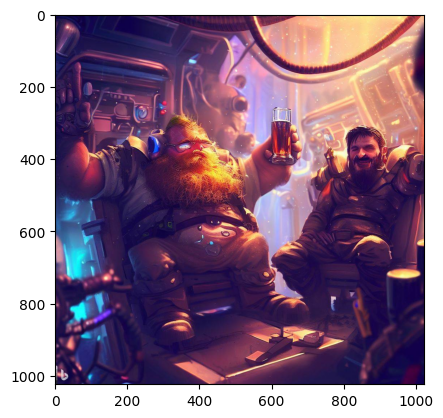

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
# a custom helper to display cv BGR image correctly
from utils.helper import plt_show


test_img = cv.imread("./tmp/test1.jpeg")
if test_img is None:
    print('Image was not read successfully')
plt_show(test_img)

------

## Simple Thresholding

It is very straightforward, all pixels are applied with the same threshold. If the value is smaller than the threshold, it will be set to 0, otherwise set to maximum value.


All simple [thresholding types](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576) are:

- cv.THRESH_BINARY
- cv.THRESH_BINARY_INV
- cv.THRESH_TRUNC
- cv.THRESH_TOZERO
- cv.THRESH_TOZERO_INV

Note that the input image is expected to be in grayscale.

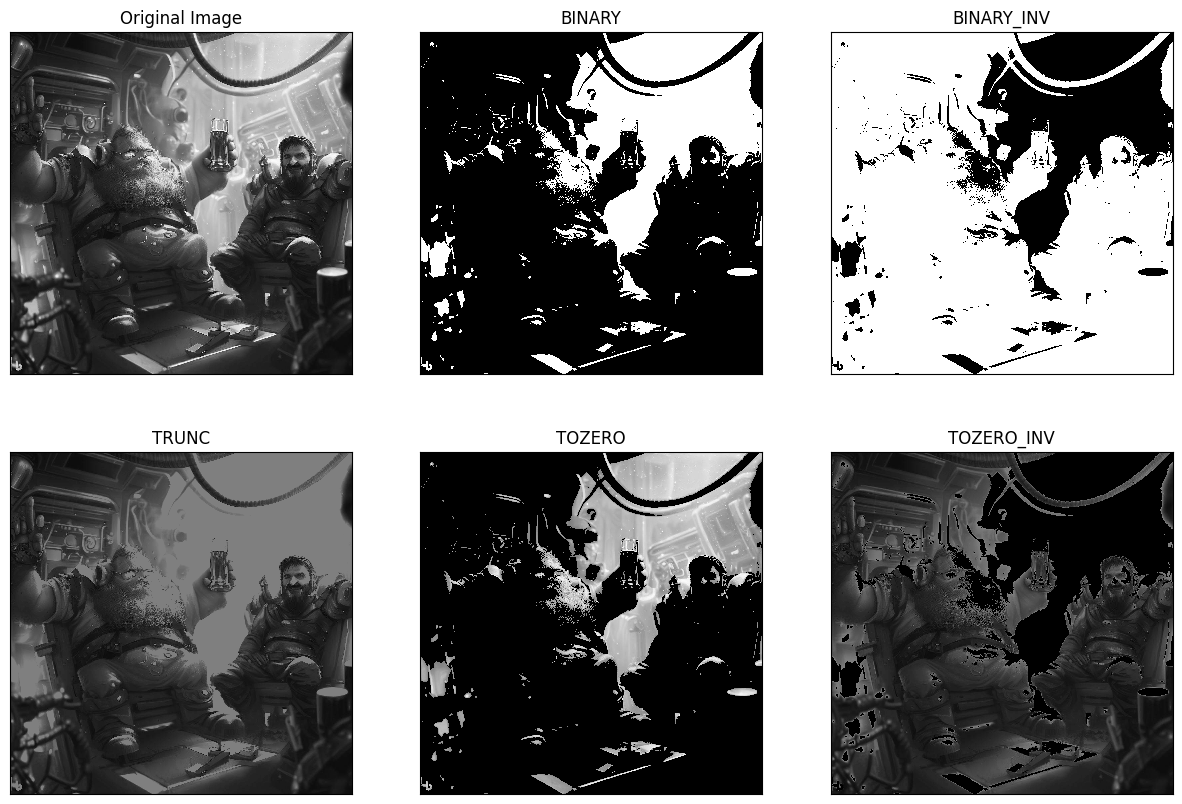

In [26]:
# Convert into grayscale first
gray_img = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)
threshold = 127
max_val = 255
thresh_types = [
    cv.THRESH_BINARY,
    cv.THRESH_BINARY_INV,
    cv.THRESH_TRUNC,
    cv.THRESH_TOZERO,
    cv.THRESH_TOZERO_INV,
]
titles = ['BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.imshow(gray_img, 'gray', vmin=0,vmax=255)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

for i, title in enumerate(titles):
    # First output is the threshold that was used and the second output is the thresholded image.
    _, img = cv.threshold(gray_img, threshold, max_val, thresh_types[i])
    plt.subplot(2,3,i+2)
    plt.imshow(img,'gray',vmin=0,vmax=255)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])


-----

## Adaptive Thresholding
In real life, different parts of an image can have different light conditions, simple thresholding with one global threshold does not work well in this case. We will tackle this problem with **adaptive thresholding**.

It determines the threshold for a pixel based on a small region around it.

From the document:

The `adaptiveMethod` parameter decides how the threshold value is calculated:

- cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
- cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.


The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.


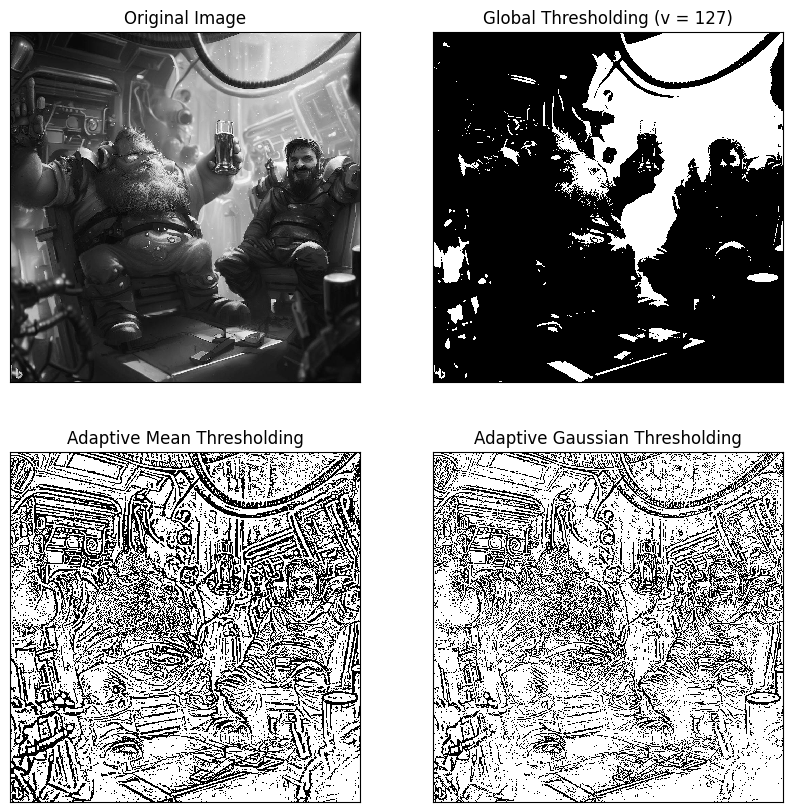

In [34]:
# Again, grayscale image is expected

# simple threshold as a baseline
_,th1 = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(
    gray_img,255,cv.ADAPTIVE_THRESH_MEAN_C,
    cv.THRESH_BINARY,11,2
)

th3 = cv.adaptiveThreshold(
    gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY,11,2
)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray_img, th1, th2, th3]
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

-------

## Otsu's Binarization

Otsu's method avoids having to choose a value and determines it automatically. It determines an optimal global threshold value from the image histogram.

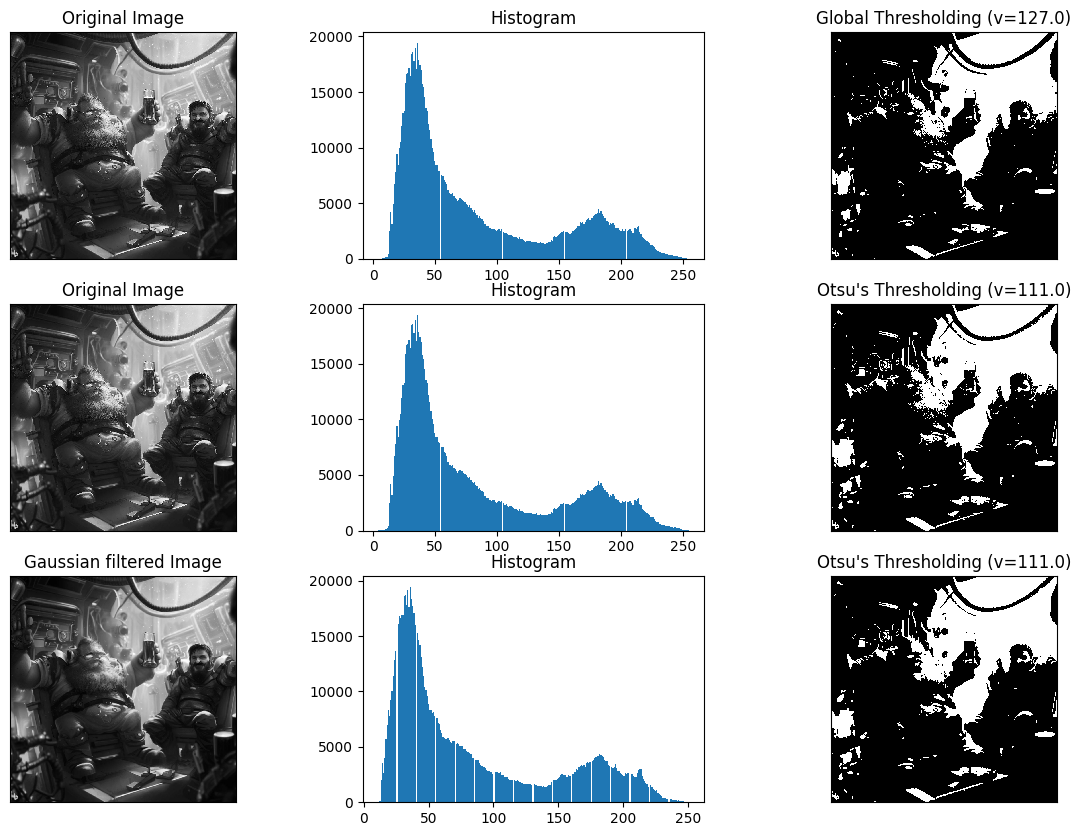

In [42]:
# global thresholding with 127 init threshold
ret1,th1 = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding with 0 as init threshold
ret2,th2 = cv.threshold(gray_img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(gray_img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [gray_img, 0, th1,
          gray_img, 0, th2,
          blur, 0, th3]
titles = ['Original Image','Histogram',f'Global Thresholding (v={ret1})',
          'Original Image','Histogram',f"Otsu's Thresholding (v={ret2})",
          'Gaussian filtered Image','Histogram',f"Otsu's Thresholding (v={ret3})"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
